# 4- Feature Enrichment 

There are 3 ways to enrich the data:
1. Feature Extraction: obtaining new features from existing features.
2. Feature Engineering: transformation of raw data into features suitable for modeling.
3. Feature Transformation: transformation of data to improve the accuracy of the algorithm.

In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("flat_file_after_data_cleansing.csv")


C:\Users\itzikjan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Expanding the output display to see more rows and columns:
pd.set_option('display.max_rows', 200 , 'display.max_columns', 200)

In [4]:
df.head(3)

,Unnamed: 0,listing_id,name,target_start_date_period,target_end_date_period,start_date_previous_period,end_date_previous_period,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,last_review,listing_url,scrape_id,last_scraped,summary,space,description,experiences_offered,notes,transit,access,interaction,house_rules,neighborhood_overview,host_about,host_since,picture_url,host_url,host_location,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,market,country_code,country,is_location_exact,property_type,bed_type,amenities,calendar_updated,first_review,calendar_last_scraped,license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,cancellation_policy,concat_comments,concat_comments_sentiment,target_num_of_day_in_period,target_num_of_booked_days,booked_up_target,num_of_day_in_previous_period,num_of_booked_days_in_previous_period,occupancy_last_period,price,minimum_nights,number_of_reviews,availability_365,accommodates,security_deposit,cleaning_fee,extra_people,maximum_nights,availability_30,availability_60,availability_90,sqrt_calculated_host_listings_count,sigmoid_calculated_host_listings_count,sqrt_guests_included,host_response_rate_cat,size_cat,avg_dollar_price_in_previous_period_cat,concat_comments_subjectivity_cat,concat_comments_polarity_cat,review_scores_value_cat,review_scores_checkin_cat,review_scores_location_cat,review_scores_communication_cat,review_scores_accuracy_cat,review_scores_cleanliness_cat,review_scores_rating_cat,reviews_per_month_cat,DaysPassed_first_review_cat,DaysPassed_last_review_cat,beds_cat,bathrooms_cat,DaysPassed_host_since_cat,host_total_listings_count_cat,bedrooms_cat,sqrt_bedrooms_cat
0,0,7071,BrightRoom with sunny greenview!,2019-06-01,2019-08-31,2018-11-07,2019-05-31,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,2018-11-04,https://www.airbnb.com/rooms/7071,2.018111e+13,2018-11-07,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft��),...",Cozy and large room in the beautiful district ...,none,I hope you enjoy your stay to the fullest! Ple...,Best access to other parts of the city via pub...,"The guests have access to the bathroom, a smal...",I am glad if I can give you advice or help as ...,Please take good care of everything during you...,"Great neighborhood with plenty of Caf��s, Bake...","I'm a creative person, adventurer, and travele...",2009-05-16,https://a0.muscache.com/im/pictures/21278/32a1...,https://www.airbnb.com/users/show/17391,"Berlin, Berlin, Germany",within an hour,t,https://a0.muscache.com/im/pictures/user/48c3d...,https://a0.muscache.com/im/pictures/user/48c3d...,Prenzlauer Berg,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,Berlin,Berlin,10437.0,"Berlin, Germany",Berlin,DE,Germany,t,Apartment,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",3 days ago,2009-08-18,2018-11-07,NaN,f,f,f,f,moderate,##������ ������������ ������������ �����������...,positive_sentiment,92,92,1,206,180,0.87,42.0,2.0,197.0,26.0,2.0,0.0,0.0,24.0,10.0,15.0,26.0,26.0,1.0,0.731059,1.0,host_response_rate_25%_to_50%,size_25%_to_50%,avg_dollar_price_in_previous_period_25%_to_50%,concat_comments_subjectivity_50%_to_75%,concat_comments_polarity_50%_to_75%,review_scores_value_0%_to_25%,review_scores_checkin_0%_to_25%,review_scores_location_25%_to_50%,review_scores_communication_0%_to_25%,review_scores_accuracy_0%_to_25%,review_scores_cleanliness_25%_to_50%,review_scores_rating_25%_to_50%,reviews_per_month_75%_to_100%,DaysPassed_first_review_75%_to_100%,DaysPassed_last_review_0%_to_25%,beds_50%_to_75%,bathrooms_0%_to_25%,DaysPassed_host_since_75%_to_100%,host_total_listings_count_0%_to_25%,bedrooms_0%_to_

In [5]:
def drop_additional_index_columns(_df):
    # dropping additional index columns that start with "Unnamed" - dropping these columns
    columns_to_drop = [x for x in _df.columns.to_list() if x.startswith("Unnamed")]
    print("dropping coulmns: ", columns_to_drop) # [Unamed..., Unamed..]
    return _df.drop(columns=columns_to_drop, axis=1, inplace=False)

df = drop_additional_index_columns(df)

dropping coulmns:  ['Unnamed: 0']


In [6]:
# Representing the dimensionality of the DataFrame (before adding new variables):
df.shape

(157864, 107)

In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157864 entries, 0 to 157863
Data columns (total 107 columns):
 #    Column                                   Non-Null Count   Dtype  
---   ------                                   --------------   -----  
 0    listing_id                               157864 non-null  int64  
 1    name                                     157451 non-null  object 
 2    target_start_date_period                 157864 non-null  object 
 3    target_end_date_period                   157864 non-null  object 
 4    start_date_previous_period               157864 non-null  object 
 5    end_date_previous_period                 157864 non-null  object 
 6    host_id                                  157864 non-null  int64  
 7    host_name                                157682 non-null  object 
 8    neighbourhood_group                      157864 non-null  object 
 9    neighbourhood                            157864 non-null  object 
 10   latitude          

# 1. Feature Extraction

The addtional variables that were created in "Addition to Flat file" notebook are:
1. size - extract it from the "description" column.
2. concat_comments_polarity (Sentiment Analysis) - extract from "concat_comments" column
3. concat_comments_subjectivity (Sentiment Analysis) - extract from "concat_comments" column
4. concat_comments_sentiment  (Sentiment Analysis) - extract from "concat_comments" column

This variables were created in the Addition to Flat file notebook because these include NA and need to be handled in the EDA and in the Data Cleansing section. 


# 2. Feature Engineering

Feature Engineering is based on the patterns from EDA section.

### 2.a. Variable modification

I have already performed transformation in the Data cleansing section (fixing outliers).


The following variables have been transfomed (because could not replaced with None): 
1. 'target_avg_dollar_price_in_period' --> 'log_target_avg_dollar_price_in_period'
2. 'calculated_host_listings_count' --> 'sqrt_calculated_host_listings' and 'sigmoid_calculated_host_listings_count'
3. 'bedrooms' --> 'sqrt_bedrooms'
4. 'guests_included' --> 'sqrt_guests_included'

### 2.b. Combination of two or more variables

###   2.b.1. Numeric Columns Correlations
Checking the correlation between the variables. 
If the correlation between the variables is high (more than 0.8 or less than -0.8) I will need to choose one of them
(the one with the higher correlation to the target variable), and create new variables that represents the transformation of them and drop the other variable.

In [8]:
df_eda_numric_correlations = pd.read_csv("eda_numric_correlations.csv")
# This table has been taken from the EDA section, representing the variables that have a high correlation 
# (more than 0.8 or less than -0.8) based on Spearman's rank correlation coefficient test.
df_eda_numric_correlations = drop_additional_index_columns(df_eda_numric_correlations)
df_eda_numric_correlations

dropping coulmns:  ['Unnamed: 0']


,var1,var2,target,correlation_between_vars,pvalue_between_vars,correlation_var1_target,pvalue_var1_target,correlation_var2_target,pvalue_var2_target
0,target_avg_dollar_price_in_period,avg_dollar_price_in_previous_period,booked_up_target,0.982365,0.0,NaN,NaN,-0.120453,7.034347e-251
1,availability_60,availability_90,booked_up_target,0.957945,0.0,-0.497006,0.000000e+00,-0.559652,0.000000e+00
2,target_avg_dollar_price_in_period,price,booked_up_target,0.951098,0.0,NaN,NaN,-0.205355,0.000000e+00
3,weekly_price,monthly_price,booked_up_target,0.925822,0.0,-0.183143,3.604881e-193,-0.191507,3.043746e-153
4,avg_dollar_price_in_previous_period,price,booked_up_target,0.917291,0.0,-0.120453,7.034347e-251,-0.205355,0.000000e+00
...,...,...,...,...,...,...,...,...,...
877,occupancy_last_period,availability_30,booked_up_target,-0.785183,0.0,0.696799,0.000000e+00,-0.421644,0.000000e+00
878,DaysPassed_last_review,reviews_per_month,booked_up_target,-0.818013,0.0,0.324409,0.000000e+00,-0.266835,0.000000e+00
879,occupancy_last_period,availability_60,booked_up_target,-0.894064,0.0,0.696799,0.000000e+00,-0.497006,0.000000e+00
880,occupancy_last_period,availability_365,booked_up_target,-0.938229,0.0,0.696799,0.000000e+00,-0.788367,0.000000e+00


In [9]:
# df is flat table after data cleansing. In the data cleansing we dropped few colums (such as columns with more than 70% of na ['square_feet', 'monthly_price', 'weekly_price', 'target_avg_dollar_price_in_period', 'log_target_avg_dollar_price_in_period'])
# In eda_numric_correlation keeping only columns that appears after data cleansing
cleansing_columns = df.columns
print("df_eda_numric_correlations shape *before* dropping colums that are not in df: ", df_eda_numric_correlations.shape)
df_eda_numric_correlations = df_eda_numric_correlations[(df_eda_numric_correlations['var1'].isin(cleansing_columns)) & 
                            (df_eda_numric_correlations['var2'].isin(cleansing_columns))]

print("df_eda_numric_correlations shape *after* dropping colums that are not in df: ", df_eda_numric_correlations.shape)
display(df_eda_numric_correlations)

df_eda_numric_correlations shape *before* dropping colums that are not in df:  (882, 9)
df_eda_numric_correlations shape *after* dropping colums that are not in df:  (155, 9)


,var1,var2,target,correlation_between_vars,pvalue_between_vars,correlation_var1_target,pvalue_var1_target,correlation_var2_target,pvalue_var2_target
1,availability_60,availability_90,booked_up_target,0.957945,0.000000e+00,-0.497006,0.000000e+00,-0.559652,0.000000e+00
5,availability_30,availability_60,booked_up_target,0.907023,0.000000e+00,-0.421644,0.000000e+00,-0.497006,0.000000e+00
7,availability_365,availability_90,booked_up_target,0.875757,0.000000e+00,-0.788367,0.000000e+00,-0.559652,0.000000e+00
8,availability_30,availability_90,booked_up_target,0.851459,0.000000e+00,-0.421644,0.000000e+00,-0.559652,0.000000e+00
10,availability_365,availability_60,booked_up_target,0.815842,0.000000e+00,-0.788367,0.000000e+00,-0.497006,0.000000e+00
12,target_num_of_day_in_period,num_of_day_in_previous_period,booked_up_target,0.807808,0.000000e+00,0.095319,0.000000e+00,0.106648,0.000000e+00
15,target_num_of_booked_days,num_of_booked_days_in_previous_period,booked_up_target,0.777582,0.000000e+00,0.800321,0.000000e+00,0.621009,0.000000e+00
20,availability_365,availability_30,booked_up_target,0.707087,0.000000e+00,-0.788367,0.000000e+00,-0.421644,0.000000e+00
21,occupancy_last_period,num_of_booked_days_in_previous_period,booked_up_target,0.683754,0.000000e+00,0.696799,0.000000e+00,0.621009,0.000000e+00
23,num_of_day_in_previous_period,num_of_booked_days_in_previous_period,booked_up_target,0.612677,0.000000e+00,0.106648,0.000000e+00,0.621009,0.000000e+00


##### 1.a Enrich with cluster analysis
Checking the correlation between numeric variables (eda_numric_correlations.csv).
There is high correlation between ['availability_30','availability_60', 'availability_90', 'availability_365'], using cluster analysis creating new var which can replace this vars. 

In [10]:
availability_columns = ['availability_30','availability_60', 'availability_90', 'availability_365']

df_eda_numric_correlations[(df_eda_numric_correlations['var1'].isin(availability_columns)) & 
                           (df_eda_numric_correlations['var2'].isin(availability_columns))]


,var1,var2,target,correlation_between_vars,pvalue_between_vars,correlation_var1_target,pvalue_var1_target,correlation_var2_target,pvalue_var2_target
1,availability_60,availability_90,booked_up_target,0.957945,0.0,-0.497006,0.0,-0.559652,0.0
5,availability_30,availability_60,booked_up_target,0.907023,0.0,-0.421644,0.0,-0.497006,0.0
7,availability_365,availability_90,booked_up_target,0.875757,0.0,-0.788367,0.0,-0.559652,0.0
8,availability_30,availability_90,booked_up_target,0.851459,0.0,-0.421644,0.0,-0.559652,0.0
10,availability_365,availability_60,booked_up_target,0.815842,0.0,-0.788367,0.0,-0.497006,0.0
20,availability_365,availability_30,booked_up_target,0.707087,0.0,-0.788367,0.0,-0.421644,0.0


In [11]:
def display_elbow_of_selected_columns(X, k_min_range=1, k_max_range=10):
    """
    Using plot of the Elbow Method to determine this optimal value of k.
    This method is only for plotting. Base on the plot the user need to select k.
    """
    
    selected_columns = X.columns
    display(X.head(1))

    distortions = []
    K = range(k_min_range,k_max_range)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X)
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(8,6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title(f'Optimal k analysis of columns: {str(selected_columns)}' )
    plt.show()

,availability_30,availability_60,availability_90,availability_365
0,15.0,26.0,26.0,26.0


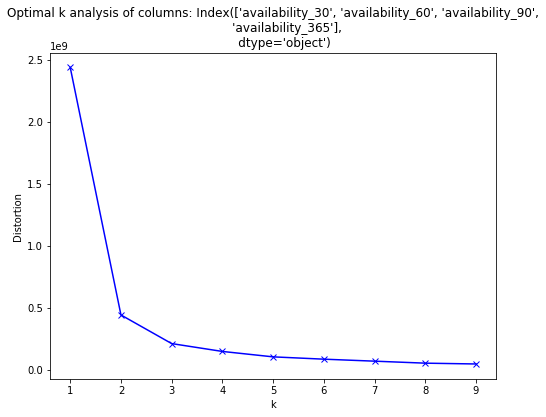

In [12]:
# Plotting kmeanModel elbow for selecting K
X = df[availability_columns]
display_elbow_of_selected_columns(X,  1, 10)


kmodel.labels_: [1 1 1 ... 2 2 2]
np.bincount(kmodel.labels_): [ 25410 103012  29442]


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


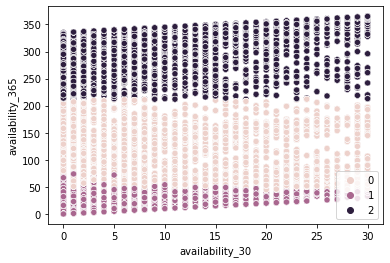

In [13]:
# Based on the above plot selecting n_clusters=3 
kmodel = KMeans(n_clusters=3, random_state=0).fit(X)
print("kmodel.labels_:", kmodel.labels_)
print("np.bincount(kmodel.labels_):", np.bincount(kmodel.labels_))
sns.scatterplot(df['availability_30'], df['availability_365'],hue= kmodel.labels_)

Based on the above it seems there are significant clusters sepration. 

In [14]:
df['kmean_cluster_availability']= kmodel.labels_
chi2_res = stats.chi2_contingency(pd.crosstab(df['kmean_cluster_availability'], df['booked_up_target']))
print("1a. pvalue of kmean_cluster_availability and booked_up_target is: ", chi2_res[1])   

1a. pvalue of kmean_cluster_availability and booked_up_target is:  0.0


'kmean_cluster_availability' has pvalue < 0.05 --> keep it as feature. 

#### 1.b  Transformation of vars with subtraction and division

Checking the correlation between the variables (eda_numric_correlations.csv).
If the correlation between 2 variables is high (more than 0.8 or less than -0.8) creating new variables of division and subtraction.


In [15]:
df_eda_numric_correlations[np.abs(df_eda_numric_correlations['correlation_between_vars'])>=0.8]

,var1,var2,target,correlation_between_vars,pvalue_between_vars,correlation_var1_target,pvalue_var1_target,correlation_var2_target,pvalue_var2_target
1,availability_60,availability_90,booked_up_target,0.957945,0.0,-0.497006,0.0,-0.559652,0.0
5,availability_30,availability_60,booked_up_target,0.907023,0.0,-0.421644,0.0,-0.497006,0.0
7,availability_365,availability_90,booked_up_target,0.875757,0.0,-0.788367,0.0,-0.559652,0.0
8,availability_30,availability_90,booked_up_target,0.851459,0.0,-0.421644,0.0,-0.559652,0.0
10,availability_365,availability_60,booked_up_target,0.815842,0.0,-0.788367,0.0,-0.497006,0.0
12,target_num_of_day_in_period,num_of_day_in_previous_period,booked_up_target,0.807808,0.0,0.095319,0.0,0.106648,0.0
879,occupancy_last_period,availability_60,booked_up_target,-0.894064,0.0,0.696799,0.0,-0.497006,0.0
880,occupancy_last_period,availability_365,booked_up_target,-0.938229,0.0,0.696799,0.0,-0.788367,0.0
881,occupancy_last_period,availability_90,booked_up_target,-0.948048,0.0,0.696799,0.0,-0.559652,0.0


In [16]:
# Adding subtraction and division variables of two variables with high correlation
# before dropping the variable with the lowest correlation with the target
def add_minus_and_div_to_numric_correlations_columns(_df:pd.DataFrame ,_df_numric_correlations: pd.DataFrame, correlation_between_vars_threshold: float = 0.8):
    """
    For each 2 numeric columns which have high corrleation between them, creating 2 new vars/fatures:
    1. var1-var2
    2. var1/var2
    """
    if correlation_between_vars_threshold:
        df_numric_correlations_filter_by_corr = _df_numric_correlations[np.abs(_df_numric_correlations['correlation_between_vars'])>=correlation_between_vars_threshold]
    else:
        df_numric_correlations_filter_by_corr = _df_numric_correlations
        
    for idx, row in df_numric_correlations_filter_by_corr.iterrows():
        var1 = row['var1']
        var2 = row['var2']
        minus_column_name = var1 + "_minus_" + var2
        div_column_name = var1 + "_div_" + var2
     
        _df[minus_column_name] = _df[var1] - _df[var2]
        _df[div_column_name] = _df[var1] / _df[var2]
    return _df

In [17]:
# transformation on each 2 columns (create minus and div for each couple of numeric columns)
df = add_minus_and_div_to_numric_correlations_columns(_df=df,_df_numric_correlations=df_eda_numric_correlations, correlation_between_vars_threshold=0.8 )
print("1b. transformation new colums:")
transform_col_list  = [col for col in df.columns if "_minus_" in col or "_div_" in col]
print("transformation new colums:", transform_col_list)

1b. transformation new colums:
transformation new colums: ['availability_60_minus_availability_90', 'availability_60_div_availability_90', 'availability_30_minus_availability_60', 'availability_30_div_availability_60', 'availability_365_minus_availability_90', 'availability_365_div_availability_90', 'availability_30_minus_availability_90', 'availability_30_div_availability_90', 'availability_365_minus_availability_60', 'availability_365_div_availability_60', 'target_num_of_day_in_period_minus_num_of_day_in_previous_period', 'target_num_of_day_in_period_div_num_of_day_in_previous_period', 'occupancy_last_period_minus_availability_60', 'occupancy_last_period_div_availability_60', 'occupancy_last_period_minus_availability_365', 'occupancy_last_period_div_availability_365', 'occupancy_last_period_minus_availability_90', 'occupancy_last_period_div_availability_90']


#### 1.c  Get numric columns that can be dropped by high correlation

Checking the correlation between the variables (eda_numric_correlations.csv).
If the correlation between 2 variables is high (more than 0.8 or less than -0.8) check which variable has the highest and the lowest correlation with the target and keeping only the var that has highest correlation with the target.  
   

In [18]:
def get_numeric_cols_to_drop_by_correlation(_df_numric_correlations, correlation_between_vars_threshold = 0.8):
    """
    For each 2 numeric columns which have high corrleation between them (more then 80%), 
    check which variable has the highest and the lowest correlation with the target, 
    keep the var with highest correlation to the target and get a list of drop vars which has lowest correlation with target
    _df_numric_correlations has the following columns
    ['var1', 'var2', 'target', 'correlation_between_vars',
           'pvalue_between_vars', 'correlation_var1_target', 'pvalue_var1_target',
           'correlation_var2_target', 'pvalue_var2_target']
    """
    # get rows that 2 vars/features have high correlation between them. 
    df_numric_correlations_filter_by_corr = _df_numric_correlations[np.abs(_df_numric_correlations['correlation_between_vars'])>=correlation_between_vars_threshold]
    
    columns_to_drop = set()
    # for each row we drop the var that has low correlation with target column
    for idx, row in df_numric_correlations_filter_by_corr.iterrows():
        correlation_var1_target = row['correlation_var1_target']
        correlation_var2_target = row['correlation_var2_target']
        if correlation_var1_target and correlation_var2_target and np.abs(correlation_var1_target) > np.abs(correlation_var2_target):
            columns_to_drop.add(row['var2'])
        else:
            columns_to_drop.add(row['var1'])
    return columns_to_drop



In [19]:
# Get a list of numeric columns to drop (for each couple of vars drop the columns with lowest correlation to target)
numeric_cols_to_drop = get_numeric_cols_to_drop_by_correlation(df_eda_numric_correlations)
print("1c. dropping colums:", numeric_cols_to_drop)

df.drop(numeric_cols_to_drop, inplace=True, axis=1)

1c. dropping colums: {'availability_60', 'target_num_of_day_in_period', 'availability_90', 'occupancy_last_period', 'availability_30'}


### Explantion of the reuslts:
1. 'availability_30', 'availability_60', 'availability_90' and 'availability_365' have high correlation between each of them (correlatioin is more than  80%). The fucntion keeps only 'availability_365' var because this var has the highest correlation with the target. 
2. "target_avg_dollar_price_in_period", "avg_dollar_price_in_previous_period", "weekly_price" and "price" have high correlatioin between each of them but "price" has the highest correlation to target. 
Also, monthly_price is not dropped because it doesn't have correlation with price. 

In [20]:
print(df.shape)
df.info(verbose=True, show_counts=True)

(157864, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157864 entries, 0 to 157863
Data columns (total 121 columns):
 #    Column                                                           Non-Null Count   Dtype  
---   ------                                                           --------------   -----  
 0    listing_id                                                       157864 non-null  int64  
 1    name                                                             157451 non-null  object 
 2    target_start_date_period                                         157864 non-null  object 
 3    target_end_date_period                                           157864 non-null  object 
 4    start_date_previous_period                                       157864 non-null  object 
 5    end_date_previous_period                                         157864 non-null  object 
 6    host_id                                                          157864 non-null  int64  
 7    host

### 2.b.2. Categorical Columns Statistically Difference

Using chi-squared test to determine whether there is a statistically significant difference between the two categories variables.

This chi-squared test assist finding new variables.
I am going to explore if there are combinations between the values of the categories variables that are statistically significant to the target "booked_up_target", and adding them as variables to the data.

In [21]:
df_eda_pval_of_categorical_columns = pd.read_csv("eda_pval_of_categorical_columns.csv")
# This table has been taken from the EDA section, representing the categorical variables 
# that have statistically significant differences,  based on  Chi-squared Test (χ2 test).
df_eda_pval_of_categorical_columns = drop_additional_index_columns(df_eda_pval_of_categorical_columns)
df_eda_pval_of_categorical_columns

dropping coulmns:  ['Unnamed: 0']


,var1,var2,pvalue_between_vars
0,neighbourhood_group,room_type,0.000000e+00
1,neighbourhood_group,host_response_time,2.101539e-86
2,neighbourhood_group,host_is_superhost,3.864568e-187
3,neighbourhood_group,host_has_profile_pic,1.014734e-19
4,neighbourhood_group,host_identity_verified,1.598744e-190
5,neighbourhood_group,bed_type,3.210778e-131
6,neighbourhood_group,instant_bookable,2.068891e-228
7,neighbourhood_group,require_guest_profile_picture,8.483871e-18
8,neighbourhood_group,require_guest_phone_verification,1.186065e-38
9,neighbourhood_group,cancellation_policy,0.000000e+00


In [22]:
# obsolute method (not in use any more, keeping it becuase of the test)
def get_dummies_of_2_vars(_df, _col1, _col2, unique_values_limitation=7):
    """
    "create dummies" of 2 categorical colums -> create new column for each possibale metch of value. 
    """
    col1_unique_values = _df[_col1].unique()
    col2_unique_values = _df[_col2].unique()
    col1_unique_count = len(col1_unique_values)
    col2_unique_count = len(col2_unique_values)
    if unique_values_limitation != None:
        if  col1_unique_count > unique_values_limitation or col2_unique_count > unique_values_limitation:
            print(f' *** {_col1} has {col1_unique_count} unique values and {_col2} has {col2_unique_count} unique values - Not creating dummies ****')
            return _df
    print(_col1, "number of unique values: ", len(col1_unique_values))
    print(_col2, "number of unique values: ", len(col2_unique_values))
    added_columns = []
    def _is_dummy(_row_val_1,_unique_val1,_row_val_2 ,_unique_val2):
        if _row_val_1 == _unique_val1 and _row_val_2 == _unique_val2:
            return 1
        else:
            return 0
        
    for unique_val_1 in col1_unique_values:
        for unique_val_2 in col2_unique_values:
            
            print("_col1:", _col1 ,"unique_val_1: ", unique_val_1,"_col2:",_col2, "unique_val_2: ", unique_val_2)
            new_col = "_".join([_col1, unique_val_1, _col2, unique_val_2])
            added_columns.append(new_col)
            print("new_col:", new_col)
            _df[new_col] = _df.apply(lambda row:_is_dummy(row[_col1], unique_val_1, row[_col2], unique_val_2),axis=1)
    print("number of added columns", len(added_columns))
    return _df

###############################################################################################
#### Test
###############################################################################################
df_test = pd.DataFrame({"my_col_1":["a1", "a2", "a1","a1"], "my_col_2": ["b1", "b1", "b2", "b2"]})
df_actual_test = get_dummies_of_2_vars(df_test, 'my_col_1', "my_col_2")
display(df_actual_test)
df_expected_test = pd.DataFrame({"my_col_1":["a1", "a2", "a1","a1"], "my_col_2": ["b1", "b1", "b2", "b2"], 
                           "my_col_1_a1_my_col_2_b1": [1, 0 , 0 ,0],
                           "my_col_1_a1_my_col_2_b2": [0, 0, 1 , 1],
                           "my_col_1_a2_my_col_2_b1": [0, 1, 0, 0],
                           "my_col_1_a2_my_col_2_b2": [0, 0, 0, 0]})

pd.testing.assert_frame_equal(df_actual_test,df_expected_test)

my_col_1 number of unique values:  2
my_col_2 number of unique values:  2
_col1: my_col_1 unique_val_1:  a1 _col2: my_col_2 unique_val_2:  b1
new_col: my_col_1_a1_my_col_2_b1
_col1: my_col_1 unique_val_1:  a1 _col2: my_col_2 unique_val_2:  b2
new_col: my_col_1_a1_my_col_2_b2
_col1: my_col_1 unique_val_1:  a2 _col2: my_col_2 unique_val_2:  b1
new_col: my_col_1_a2_my_col_2_b1
_col1: my_col_1 unique_val_1:  a2 _col2: my_col_2 unique_val_2:  b2
new_col: my_col_1_a2_my_col_2_b2
number of added columns 4


,my_col_1,my_col_2,my_col_1_a1_my_col_2_b1,my_col_1_a1_my_col_2_b2,my_col_1_a2_my_col_2_b1,my_col_1_a2_my_col_2_b2
0,a1,b1,1,0,0,0
1,a2,b1,0,0,1,0
2,a1,b2,0,1,0,0
3,a1,b2,0,1,0,0


In [23]:
def get_dummies_of_2_vars_v2(_df, _col1, _col2,_target_col="booked_up_target", unique_values_limitation=5, pval_threshold_of_new_col_with_target=0.05):
    """
    "create dummies" of 2 categorical colums -> create new column for each possibale metch of value. 
    """
    col1_unique_values = _df[_col1].unique()
    col2_unique_values = _df[_col2].unique()
    col1_unique_count = len(col1_unique_values)
    col2_unique_count = len(col2_unique_values)
    added_columns = []
    if unique_values_limitation != None:
        if  col1_unique_count > unique_values_limitation or col2_unique_count > unique_values_limitation:
            print(f' *** {_col1} has {col1_unique_count} unique values and {_col2} has {col2_unique_count} unique values - Not creating dummies ****')
            return _df, []
    print(_col1, "number of unique values: ", len(col1_unique_values))
    print(_col2, "number of unique values: ", len(col2_unique_values))
    
    def _is_dummy(_row_val_1,_unique_val1,_row_val_2 ,_unique_val2):
        if _row_val_1 == _unique_val1 and _row_val_2 == _unique_val2:
            return 1
        else:
            return 0
        
    for unique_val_1 in col1_unique_values:
        for unique_val_2 in col2_unique_values:
            
            print("_col1:", _col1 ,"unique_val_1: ", unique_val_1,"_col2:",_col2, "unique_val_2: ", unique_val_2)
            new_col = "_".join([_col1, unique_val_1, _col2, unique_val_2])
            added_columns.append(new_col)
            print("new_col:", new_col)
            _df[new_col] = _df.apply(lambda row:_is_dummy(row[_col1], unique_val_1, row[_col2], unique_val_2),axis=1)
            chi2_res = stats.chi2_contingency(pd.crosstab(_df[new_col],_df[_target_col]))
            pval = chi2_res[1]
            if pval > pval_threshold_of_new_col_with_target:
                print(f"****chi2_contingency between {new_col} and {_target_col} have pval of {pval} (more than {pval_threshold_of_new_col_with_target})")
                print(f"***drop {new_col} ")
                _df.drop(new_col, inplace=True, axis=1)
            else:
                added_columns.append(new_col)
    print("number of added columns", len(added_columns))
    return _df, added_columns



In [25]:
df_eda_pval_of_categorical_columns

,var1,var2,pvalue_between_vars
0,neighbourhood_group,room_type,0.000000e+00
1,neighbourhood_group,host_response_time,2.101539e-86
2,neighbourhood_group,host_is_superhost,3.864568e-187
3,neighbourhood_group,host_has_profile_pic,1.014734e-19
4,neighbourhood_group,host_identity_verified,1.598744e-190
5,neighbourhood_group,bed_type,3.210778e-131
6,neighbourhood_group,instant_bookable,2.068891e-228
7,neighbourhood_group,require_guest_profile_picture,8.483871e-18
8,neighbourhood_group,require_guest_phone_verification,1.186065e-38
9,neighbourhood_group,cancellation_policy,0.000000e+00


In [26]:
from datetime import datetime
total_columns = []
num_of_uniqiue_values = {}
for index, row in df_eda_pval_of_categorical_columns.iterrows():
    start_time = datetime.now()
    var1 = row['var1']
    var2 = row['var2']
    df[var1] = df[var1].astype('category')
    df[var2] = df[var2].astype('category')
    print("var1: ", var1)
    print("var2: ", var2)
    # _df, _col1, _col2,_target_col="booked_up_target", unique_values_limitation=5, pval_threshold_of_new_col_with_target=0.05
    df, added_columns = get_dummies_of_2_vars_v2(_df=df, _col1=var1, _col2=var2, _target_col="booked_up_target", unique_values_limitation=5, pval_threshold_of_new_col_with_target=0.05)
    total_columns + added_columns
    end_time = datetime.now()
    print("added_columns: ", added_columns)
    print(row['var1'], row['var2'], "total time: ", end_time-start_time)
print("total_columns added: ", total_columns)

var1:  neighbourhood_group
var2:  room_type
 *** neighbourhood_group has 12 unique values and room_type has 3 unique values - Not creating dummies ****
added_columns:  []
neighbourhood_group room_type total time:  0:00:00.233856
var1:  neighbourhood_group
var2:  host_response_time
 *** neighbourhood_group has 12 unique values and host_response_time has 5 unique values - Not creating dummies ****
added_columns:  []
neighbourhood_group host_response_time total time:  0:00:00.118926
var1:  neighbourhood_group
var2:  host_is_superhost
 *** neighbourhood_group has 12 unique values and host_is_superhost has 3 unique values - Not creating dummies ****
added_columns:  []
neighbourhood_group host_is_superhost total time:  0:00:00.111932
var1:  neighbourhood_group
var2:  host_has_profile_pic
 *** neighbourhood_group has 12 unique values and host_has_profile_pic has 3 unique values - Not creating dummies ****
added_columns:  []
neighbourhood_group host_has_profile_pic total time:  0:00:00.118927


_col1: room_type unique_val_1:  Private room _col2: host_is_superhost unique_val_2:  missing_host_is_superhost
new_col: room_type_Private room_host_is_superhost_missing_host_is_superhost
_col1: room_type unique_val_1:  Entire home/apt _col2: host_is_superhost unique_val_2:  t
new_col: room_type_Entire home/apt_host_is_superhost_t
_col1: room_type unique_val_1:  Entire home/apt _col2: host_is_superhost unique_val_2:  f
new_col: room_type_Entire home/apt_host_is_superhost_f
_col1: room_type unique_val_1:  Entire home/apt _col2: host_is_superhost unique_val_2:  missing_host_is_superhost
new_col: room_type_Entire home/apt_host_is_superhost_missing_host_is_superhost
_col1: room_type unique_val_1:  Shared room _col2: host_is_superhost unique_val_2:  t
new_col: room_type_Shared room_host_is_superhost_t
_col1: room_type unique_val_1:  Shared room _col2: host_is_superhost unique_val_2:  f
new_col: room_type_Shared room_host_is_superhost_f
_col1: room_type unique_val_1:  Shared room _col2: host_

_col1: room_type unique_val_1:  Private room _col2: bed_type unique_val_2:  Pull-out Sofa
new_col: room_type_Private room_bed_type_Pull-out Sofa
_col1: room_type unique_val_1:  Private room _col2: bed_type unique_val_2:  Couch
new_col: room_type_Private room_bed_type_Couch
****chi2_contingency between room_type_Private room_bed_type_Couch and booked_up_target have pval of 0.9542361905455927 (more than 0.05)
***drop room_type_Private room_bed_type_Couch 
_col1: room_type unique_val_1:  Private room _col2: bed_type unique_val_2:  Futon
new_col: room_type_Private room_bed_type_Futon
_col1: room_type unique_val_1:  Private room _col2: bed_type unique_val_2:  Airbed
new_col: room_type_Private room_bed_type_Airbed
****chi2_contingency between room_type_Private room_bed_type_Airbed and booked_up_target have pval of 0.422743977200719 (more than 0.05)
***drop room_type_Private room_bed_type_Airbed 
_col1: room_type unique_val_1:  Entire home/apt _col2: bed_type unique_val_2:  Real Bed
new_col: 

_col1: room_type unique_val_1:  Private room _col2: require_guest_phone_verification unique_val_2:  t
new_col: room_type_Private room_require_guest_phone_verification_t
_col1: room_type unique_val_1:  Entire home/apt _col2: require_guest_phone_verification unique_val_2:  f
new_col: room_type_Entire home/apt_require_guest_phone_verification_f
_col1: room_type unique_val_1:  Entire home/apt _col2: require_guest_phone_verification unique_val_2:  t
new_col: room_type_Entire home/apt_require_guest_phone_verification_t
_col1: room_type unique_val_1:  Shared room _col2: require_guest_phone_verification unique_val_2:  f
new_col: room_type_Shared room_require_guest_phone_verification_f
_col1: room_type unique_val_1:  Shared room _col2: require_guest_phone_verification unique_val_2:  t
new_col: room_type_Shared room_require_guest_phone_verification_t
****chi2_contingency between room_type_Shared room_require_guest_phone_verification_t and booked_up_target have pval of 1.0 (more than 0.05)
***dro

_col1: room_type unique_val_1:  Entire home/apt _col2: concat_comments_sentiment unique_val_2:  neutral_sentiment
new_col: room_type_Entire home/apt_concat_comments_sentiment_neutral_sentiment
_col1: room_type unique_val_1:  Entire home/apt _col2: concat_comments_sentiment unique_val_2:  missing_concat_comments_sentiment
new_col: room_type_Entire home/apt_concat_comments_sentiment_missing_concat_comments_sentiment
****chi2_contingency between room_type_Entire home/apt_concat_comments_sentiment_missing_concat_comments_sentiment and booked_up_target have pval of 0.1156006856559083 (more than 0.05)
***drop room_type_Entire home/apt_concat_comments_sentiment_missing_concat_comments_sentiment 
_col1: room_type unique_val_1:  Entire home/apt _col2: concat_comments_sentiment unique_val_2:  negative_sentiment
new_col: room_type_Entire home/apt_concat_comments_sentiment_negative_sentiment
****chi2_contingency between room_type_Entire home/apt_concat_comments_sentiment_negative_sentiment and boo

_col1: host_response_time unique_val_1:  within an hour _col2: host_has_profile_pic unique_val_2:  f
new_col: host_response_time_within an hour_host_has_profile_pic_f
_col1: host_response_time unique_val_1:  within an hour _col2: host_has_profile_pic unique_val_2:  missing_host_has_profile_pic
new_col: host_response_time_within an hour_host_has_profile_pic_missing_host_has_profile_pic
****chi2_contingency between host_response_time_within an hour_host_has_profile_pic_missing_host_has_profile_pic and booked_up_target have pval of 1.0 (more than 0.05)
***drop host_response_time_within an hour_host_has_profile_pic_missing_host_has_profile_pic 
_col1: host_response_time unique_val_1:  within a few hours _col2: host_has_profile_pic unique_val_2:  t
new_col: host_response_time_within a few hours_host_has_profile_pic_t
_col1: host_response_time unique_val_1:  within a few hours _col2: host_has_profile_pic unique_val_2:  f
new_col: host_response_time_within a few hours_host_has_profile_pic_f
*

_col1: host_response_time unique_val_1:  within a day _col2: host_identity_verified unique_val_2:  t
new_col: host_response_time_within a day_host_identity_verified_t
_col1: host_response_time unique_val_1:  within a day _col2: host_identity_verified unique_val_2:  f
new_col: host_response_time_within a day_host_identity_verified_f
_col1: host_response_time unique_val_1:  within a day _col2: host_identity_verified unique_val_2:  missing_host_identity_verified
new_col: host_response_time_within a day_host_identity_verified_missing_host_identity_verified
****chi2_contingency between host_response_time_within a day_host_identity_verified_missing_host_identity_verified and booked_up_target have pval of 1.0 (more than 0.05)
***drop host_response_time_within a day_host_identity_verified_missing_host_identity_verified 
_col1: host_response_time unique_val_1:  a few days or more _col2: host_identity_verified unique_val_2:  t
new_col: host_response_time_a few days or more_host_identity_verified

_col1: host_response_time unique_val_1:  a few days or more _col2: bed_type unique_val_2:  Couch
new_col: host_response_time_a few days or more_bed_type_Couch
****chi2_contingency between host_response_time_a few days or more_bed_type_Couch and booked_up_target have pval of 1.0 (more than 0.05)
***drop host_response_time_a few days or more_bed_type_Couch 
_col1: host_response_time unique_val_1:  a few days or more _col2: bed_type unique_val_2:  Futon
new_col: host_response_time_a few days or more_bed_type_Futon
_col1: host_response_time unique_val_1:  a few days or more _col2: bed_type unique_val_2:  Airbed
new_col: host_response_time_a few days or more_bed_type_Airbed
****chi2_contingency between host_response_time_a few days or more_bed_type_Airbed and booked_up_target have pval of 1.0 (more than 0.05)
***drop host_response_time_a few days or more_bed_type_Airbed 
number of added columns 44
added_columns:  ['host_response_time_within an hour_bed_type_Real Bed', 'host_response_time_wi

_col1: host_response_time unique_val_1:  a few days or more _col2: require_guest_profile_picture unique_val_2:  f
new_col: host_response_time_a few days or more_require_guest_profile_picture_f
_col1: host_response_time unique_val_1:  a few days or more _col2: require_guest_profile_picture unique_val_2:  t
new_col: host_response_time_a few days or more_require_guest_profile_picture_t
number of added columns 20
added_columns:  ['host_response_time_within an hour_require_guest_profile_picture_f', 'host_response_time_within an hour_require_guest_profile_picture_f', 'host_response_time_within an hour_require_guest_profile_picture_t', 'host_response_time_within an hour_require_guest_profile_picture_t', 'host_response_time_within a few hours_require_guest_profile_picture_f', 'host_response_time_within a few hours_require_guest_profile_picture_f', 'host_response_time_within a few hours_require_guest_profile_picture_t', 'host_response_time_within a few hours_require_guest_profile_picture_t', 'h

_col1: host_response_time unique_val_1:  missing_host_response_time _col2: cancellation_policy unique_val_2:  moderate
new_col: host_response_time_missing_host_response_time_cancellation_policy_moderate
_col1: host_response_time unique_val_1:  missing_host_response_time _col2: cancellation_policy unique_val_2:  strict_14_with_grace_period
new_col: host_response_time_missing_host_response_time_cancellation_policy_strict_14_with_grace_period
_col1: host_response_time unique_val_1:  missing_host_response_time _col2: cancellation_policy unique_val_2:  flexible
new_col: host_response_time_missing_host_response_time_cancellation_policy_flexible
_col1: host_response_time unique_val_1:  missing_host_response_time _col2: cancellation_policy unique_val_2:  super_strict_30
new_col: host_response_time_missing_host_response_time_cancellation_policy_super_strict_30
_col1: host_response_time unique_val_1:  missing_host_response_time _col2: cancellation_policy unique_val_2:  super_strict_60
new_col: h

_col1: host_response_time unique_val_1:  within an hour _col2: concat_comments_sentiment unique_val_2:  negative_sentiment
new_col: host_response_time_within an hour_concat_comments_sentiment_negative_sentiment
****chi2_contingency between host_response_time_within an hour_concat_comments_sentiment_negative_sentiment and booked_up_target have pval of 0.07348740837334779 (more than 0.05)
***drop host_response_time_within an hour_concat_comments_sentiment_negative_sentiment 
_col1: host_response_time unique_val_1:  within a few hours _col2: concat_comments_sentiment unique_val_2:  positive_sentiment
new_col: host_response_time_within a few hours_concat_comments_sentiment_positive_sentiment
_col1: host_response_time unique_val_1:  within a few hours _col2: concat_comments_sentiment unique_val_2:  neutral_sentiment
new_col: host_response_time_within a few hours_concat_comments_sentiment_neutral_sentiment
_col1: host_response_time unique_val_1:  within a few hours _col2: concat_comments_sen

_col1: host_is_superhost unique_val_1:  t _col2: host_has_profile_pic unique_val_2:  f
new_col: host_is_superhost_t_host_has_profile_pic_f
****chi2_contingency between host_is_superhost_t_host_has_profile_pic_f and booked_up_target have pval of 0.19149273179939805 (more than 0.05)
***drop host_is_superhost_t_host_has_profile_pic_f 
_col1: host_is_superhost unique_val_1:  t _col2: host_has_profile_pic unique_val_2:  missing_host_has_profile_pic
new_col: host_is_superhost_t_host_has_profile_pic_missing_host_has_profile_pic
****chi2_contingency between host_is_superhost_t_host_has_profile_pic_missing_host_has_profile_pic and booked_up_target have pval of 1.0 (more than 0.05)
***drop host_is_superhost_t_host_has_profile_pic_missing_host_has_profile_pic 
_col1: host_is_superhost unique_val_1:  f _col2: host_has_profile_pic unique_val_2:  t
new_col: host_is_superhost_f_host_has_profile_pic_t
_col1: host_is_superhost unique_val_1:  f _col2: host_has_profile_pic unique_val_2:  f
new_col: host_

_col1: host_is_superhost unique_val_1:  f _col2: bed_type unique_val_2:  Real Bed
new_col: host_is_superhost_f_bed_type_Real Bed
_col1: host_is_superhost unique_val_1:  f _col2: bed_type unique_val_2:  Pull-out Sofa
new_col: host_is_superhost_f_bed_type_Pull-out Sofa
****chi2_contingency between host_is_superhost_f_bed_type_Pull-out Sofa and booked_up_target have pval of 0.7948109066545733 (more than 0.05)
***drop host_is_superhost_f_bed_type_Pull-out Sofa 
_col1: host_is_superhost unique_val_1:  f _col2: bed_type unique_val_2:  Couch
new_col: host_is_superhost_f_bed_type_Couch
****chi2_contingency between host_is_superhost_f_bed_type_Couch and booked_up_target have pval of 0.31149171576613754 (more than 0.05)
***drop host_is_superhost_f_bed_type_Couch 
_col1: host_is_superhost unique_val_1:  f _col2: bed_type unique_val_2:  Futon
new_col: host_is_superhost_f_bed_type_Futon
_col1: host_is_superhost unique_val_1:  f _col2: bed_type unique_val_2:  Airbed
new_col: host_is_superhost_f_bed_

_col1: host_is_superhost unique_val_1:  t _col2: require_guest_phone_verification unique_val_2:  t
new_col: host_is_superhost_t_require_guest_phone_verification_t
_col1: host_is_superhost unique_val_1:  f _col2: require_guest_phone_verification unique_val_2:  f
new_col: host_is_superhost_f_require_guest_phone_verification_f
_col1: host_is_superhost unique_val_1:  f _col2: require_guest_phone_verification unique_val_2:  t
new_col: host_is_superhost_f_require_guest_phone_verification_t
_col1: host_is_superhost unique_val_1:  missing_host_is_superhost _col2: require_guest_phone_verification unique_val_2:  f
new_col: host_is_superhost_missing_host_is_superhost_require_guest_phone_verification_f
_col1: host_is_superhost unique_val_1:  missing_host_is_superhost _col2: require_guest_phone_verification unique_val_2:  t
new_col: host_is_superhost_missing_host_is_superhost_require_guest_phone_verification_t
****chi2_contingency between host_is_superhost_missing_host_is_superhost_require_guest_ph

_col1: host_is_superhost unique_val_1:  t _col2: concat_comments_sentiment unique_val_2:  missing_concat_comments_sentiment
new_col: host_is_superhost_t_concat_comments_sentiment_missing_concat_comments_sentiment
_col1: host_is_superhost unique_val_1:  t _col2: concat_comments_sentiment unique_val_2:  negative_sentiment
new_col: host_is_superhost_t_concat_comments_sentiment_negative_sentiment
****chi2_contingency between host_is_superhost_t_concat_comments_sentiment_negative_sentiment and booked_up_target have pval of 1.0 (more than 0.05)
***drop host_is_superhost_t_concat_comments_sentiment_negative_sentiment 
_col1: host_is_superhost unique_val_1:  f _col2: concat_comments_sentiment unique_val_2:  positive_sentiment
new_col: host_is_superhost_f_concat_comments_sentiment_positive_sentiment
_col1: host_is_superhost unique_val_1:  f _col2: concat_comments_sentiment unique_val_2:  neutral_sentiment
new_col: host_is_superhost_f_concat_comments_sentiment_neutral_sentiment
_col1: host_is_su

_col1: host_has_profile_pic unique_val_1:  t _col2: bed_type unique_val_2:  Pull-out Sofa
new_col: host_has_profile_pic_t_bed_type_Pull-out Sofa
_col1: host_has_profile_pic unique_val_1:  t _col2: bed_type unique_val_2:  Couch
new_col: host_has_profile_pic_t_bed_type_Couch
****chi2_contingency between host_has_profile_pic_t_bed_type_Couch and booked_up_target have pval of 0.4894006174176325 (more than 0.05)
***drop host_has_profile_pic_t_bed_type_Couch 
_col1: host_has_profile_pic unique_val_1:  t _col2: bed_type unique_val_2:  Futon
new_col: host_has_profile_pic_t_bed_type_Futon
_col1: host_has_profile_pic unique_val_1:  t _col2: bed_type unique_val_2:  Airbed
new_col: host_has_profile_pic_t_bed_type_Airbed
_col1: host_has_profile_pic unique_val_1:  f _col2: bed_type unique_val_2:  Real Bed
new_col: host_has_profile_pic_f_bed_type_Real Bed
_col1: host_has_profile_pic unique_val_1:  f _col2: bed_type unique_val_2:  Pull-out Sofa
new_col: host_has_profile_pic_f_bed_type_Pull-out Sofa
**

_col1: host_has_profile_pic unique_val_1:  t _col2: cancellation_policy unique_val_2:  super_strict_30
new_col: host_has_profile_pic_t_cancellation_policy_super_strict_30
_col1: host_has_profile_pic unique_val_1:  t _col2: cancellation_policy unique_val_2:  super_strict_60
new_col: host_has_profile_pic_t_cancellation_policy_super_strict_60
_col1: host_has_profile_pic unique_val_1:  f _col2: cancellation_policy unique_val_2:  moderate
new_col: host_has_profile_pic_f_cancellation_policy_moderate
****chi2_contingency between host_has_profile_pic_f_cancellation_policy_moderate and booked_up_target have pval of 0.3414764609381911 (more than 0.05)
***drop host_has_profile_pic_f_cancellation_policy_moderate 
_col1: host_has_profile_pic unique_val_1:  f _col2: cancellation_policy unique_val_2:  strict_14_with_grace_period
new_col: host_has_profile_pic_f_cancellation_policy_strict_14_with_grace_period
****chi2_contingency between host_has_profile_pic_f_cancellation_policy_strict_14_with_grace_p

_col1: host_has_profile_pic unique_val_1:  missing_host_has_profile_pic _col2: concat_comments_sentiment unique_val_2:  negative_sentiment
new_col: host_has_profile_pic_missing_host_has_profile_pic_concat_comments_sentiment_negative_sentiment
****chi2_contingency between host_has_profile_pic_missing_host_has_profile_pic_concat_comments_sentiment_negative_sentiment and booked_up_target have pval of 1.0 (more than 0.05)
***drop host_has_profile_pic_missing_host_has_profile_pic_concat_comments_sentiment_negative_sentiment 
number of added columns 22
added_columns:  ['host_has_profile_pic_t_concat_comments_sentiment_positive_sentiment', 'host_has_profile_pic_t_concat_comments_sentiment_positive_sentiment', 'host_has_profile_pic_t_concat_comments_sentiment_neutral_sentiment', 'host_has_profile_pic_t_concat_comments_sentiment_neutral_sentiment', 'host_has_profile_pic_t_concat_comments_sentiment_missing_concat_comments_sentiment', 'host_has_profile_pic_t_concat_comments_sentiment_missing_conc

_col1: host_identity_verified unique_val_1:  f _col2: instant_bookable unique_val_2:  t
new_col: host_identity_verified_f_instant_bookable_t
_col1: host_identity_verified unique_val_1:  missing_host_identity_verified _col2: instant_bookable unique_val_2:  f
new_col: host_identity_verified_missing_host_identity_verified_instant_bookable_f
_col1: host_identity_verified unique_val_1:  missing_host_identity_verified _col2: instant_bookable unique_val_2:  t
new_col: host_identity_verified_missing_host_identity_verified_instant_bookable_t
****chi2_contingency between host_identity_verified_missing_host_identity_verified_instant_bookable_t and booked_up_target have pval of 0.8984995700160444 (more than 0.05)
***drop host_identity_verified_missing_host_identity_verified_instant_bookable_t 
number of added columns 11
added_columns:  ['host_identity_verified_t_instant_bookable_f', 'host_identity_verified_t_instant_bookable_f', 'host_identity_verified_t_instant_bookable_t', 'host_identity_verifie

_col1: host_identity_verified unique_val_1:  f _col2: cancellation_policy unique_val_2:  super_strict_30
new_col: host_identity_verified_f_cancellation_policy_super_strict_30
****chi2_contingency between host_identity_verified_f_cancellation_policy_super_strict_30 and booked_up_target have pval of 0.14451393733044024 (more than 0.05)
***drop host_identity_verified_f_cancellation_policy_super_strict_30 
_col1: host_identity_verified unique_val_1:  f _col2: cancellation_policy unique_val_2:  super_strict_60
new_col: host_identity_verified_f_cancellation_policy_super_strict_60
_col1: host_identity_verified unique_val_1:  missing_host_identity_verified _col2: cancellation_policy unique_val_2:  moderate
new_col: host_identity_verified_missing_host_identity_verified_cancellation_policy_moderate
_col1: host_identity_verified unique_val_1:  missing_host_identity_verified _col2: cancellation_policy unique_val_2:  strict_14_with_grace_period
new_col: host_identity_verified_missing_host_identity_

_col1: bed_type unique_val_1:  Real Bed _col2: instant_bookable unique_val_2:  t
new_col: bed_type_Real Bed_instant_bookable_t
_col1: bed_type unique_val_1:  Pull-out Sofa _col2: instant_bookable unique_val_2:  f
new_col: bed_type_Pull-out Sofa_instant_bookable_f
_col1: bed_type unique_val_1:  Pull-out Sofa _col2: instant_bookable unique_val_2:  t
new_col: bed_type_Pull-out Sofa_instant_bookable_t
****chi2_contingency between bed_type_Pull-out Sofa_instant_bookable_t and booked_up_target have pval of 0.44502108117951866 (more than 0.05)
***drop bed_type_Pull-out Sofa_instant_bookable_t 
_col1: bed_type unique_val_1:  Couch _col2: instant_bookable unique_val_2:  f
new_col: bed_type_Couch_instant_bookable_f
****chi2_contingency between bed_type_Couch_instant_bookable_f and booked_up_target have pval of 0.062090700429097645 (more than 0.05)
***drop bed_type_Couch_instant_bookable_f 
_col1: bed_type unique_val_1:  Couch _col2: instant_bookable unique_val_2:  t
new_col: bed_type_Couch_insta

_col1: bed_type unique_val_1:  Real Bed _col2: cancellation_policy unique_val_2:  strict_14_with_grace_period
new_col: bed_type_Real Bed_cancellation_policy_strict_14_with_grace_period
_col1: bed_type unique_val_1:  Real Bed _col2: cancellation_policy unique_val_2:  flexible
new_col: bed_type_Real Bed_cancellation_policy_flexible
_col1: bed_type unique_val_1:  Real Bed _col2: cancellation_policy unique_val_2:  super_strict_30
new_col: bed_type_Real Bed_cancellation_policy_super_strict_30
_col1: bed_type unique_val_1:  Real Bed _col2: cancellation_policy unique_val_2:  super_strict_60
new_col: bed_type_Real Bed_cancellation_policy_super_strict_60
_col1: bed_type unique_val_1:  Pull-out Sofa _col2: cancellation_policy unique_val_2:  moderate
new_col: bed_type_Pull-out Sofa_cancellation_policy_moderate
_col1: bed_type unique_val_1:  Pull-out Sofa _col2: cancellation_policy unique_val_2:  strict_14_with_grace_period
new_col: bed_type_Pull-out Sofa_cancellation_policy_strict_14_with_grace_p

_col1: bed_type unique_val_1:  Real Bed _col2: concat_comments_sentiment unique_val_2:  neutral_sentiment
new_col: bed_type_Real Bed_concat_comments_sentiment_neutral_sentiment
_col1: bed_type unique_val_1:  Real Bed _col2: concat_comments_sentiment unique_val_2:  missing_concat_comments_sentiment
new_col: bed_type_Real Bed_concat_comments_sentiment_missing_concat_comments_sentiment
_col1: bed_type unique_val_1:  Real Bed _col2: concat_comments_sentiment unique_val_2:  negative_sentiment
new_col: bed_type_Real Bed_concat_comments_sentiment_negative_sentiment
_col1: bed_type unique_val_1:  Pull-out Sofa _col2: concat_comments_sentiment unique_val_2:  positive_sentiment
new_col: bed_type_Pull-out Sofa_concat_comments_sentiment_positive_sentiment
_col1: bed_type unique_val_1:  Pull-out Sofa _col2: concat_comments_sentiment unique_val_2:  neutral_sentiment
new_col: bed_type_Pull-out Sofa_concat_comments_sentiment_neutral_sentiment
_col1: bed_type unique_val_1:  Pull-out Sofa _col2: concat_

number of added columns 8
added_columns:  ['instant_bookable_f_require_guest_profile_picture_f', 'instant_bookable_f_require_guest_profile_picture_f', 'instant_bookable_f_require_guest_profile_picture_t', 'instant_bookable_f_require_guest_profile_picture_t', 'instant_bookable_t_require_guest_profile_picture_f', 'instant_bookable_t_require_guest_profile_picture_f', 'instant_bookable_t_require_guest_profile_picture_t', 'instant_bookable_t_require_guest_profile_picture_t']
instant_bookable require_guest_profile_picture total time:  0:00:18.376703
var1:  instant_bookable
var2:  require_guest_phone_verification
instant_bookable number of unique values:  2
require_guest_phone_verification number of unique values:  2
_col1: instant_bookable unique_val_1:  f _col2: require_guest_phone_verification unique_val_2:  f
new_col: instant_bookable_f_require_guest_phone_verification_f
_col1: instant_bookable unique_val_1:  f _col2: require_guest_phone_verification unique_val_2:  t
new_col: instant_book

_col1: require_guest_profile_picture unique_val_1:  f _col2: require_guest_phone_verification unique_val_2:  t
new_col: require_guest_profile_picture_f_require_guest_phone_verification_t
_col1: require_guest_profile_picture unique_val_1:  t _col2: require_guest_phone_verification unique_val_2:  f
new_col: require_guest_profile_picture_t_require_guest_phone_verification_f
_col1: require_guest_profile_picture unique_val_1:  t _col2: require_guest_phone_verification unique_val_2:  t
new_col: require_guest_profile_picture_t_require_guest_phone_verification_t
number of added columns 8
added_columns:  ['require_guest_profile_picture_f_require_guest_phone_verification_f', 'require_guest_profile_picture_f_require_guest_phone_verification_f', 'require_guest_profile_picture_f_require_guest_phone_verification_t', 'require_guest_profile_picture_f_require_guest_phone_verification_t', 'require_guest_profile_picture_t_require_guest_phone_verification_f', 'require_guest_profile_picture_t_require_guest

_col1: require_guest_phone_verification unique_val_1:  f _col2: cancellation_policy unique_val_2:  strict_14_with_grace_period
new_col: require_guest_phone_verification_f_cancellation_policy_strict_14_with_grace_period
_col1: require_guest_phone_verification unique_val_1:  f _col2: cancellation_policy unique_val_2:  flexible
new_col: require_guest_phone_verification_f_cancellation_policy_flexible
_col1: require_guest_phone_verification unique_val_1:  f _col2: cancellation_policy unique_val_2:  super_strict_30
new_col: require_guest_phone_verification_f_cancellation_policy_super_strict_30
_col1: require_guest_phone_verification unique_val_1:  f _col2: cancellation_policy unique_val_2:  super_strict_60
new_col: require_guest_phone_verification_f_cancellation_policy_super_strict_60
_col1: require_guest_phone_verification unique_val_1:  t _col2: cancellation_policy unique_val_2:  moderate
new_col: require_guest_phone_verification_t_cancellation_policy_moderate
_col1: require_guest_phone_ve

_col1: cancellation_policy unique_val_1:  moderate _col2: concat_comments_sentiment unique_val_2:  negative_sentiment
new_col: cancellation_policy_moderate_concat_comments_sentiment_negative_sentiment
****chi2_contingency between cancellation_policy_moderate_concat_comments_sentiment_negative_sentiment and booked_up_target have pval of 0.20755383958294885 (more than 0.05)
***drop cancellation_policy_moderate_concat_comments_sentiment_negative_sentiment 
_col1: cancellation_policy unique_val_1:  strict_14_with_grace_period _col2: concat_comments_sentiment unique_val_2:  positive_sentiment
new_col: cancellation_policy_strict_14_with_grace_period_concat_comments_sentiment_positive_sentiment
_col1: cancellation_policy unique_val_1:  strict_14_with_grace_period _col2: concat_comments_sentiment unique_val_2:  neutral_sentiment
new_col: cancellation_policy_strict_14_with_grace_period_concat_comments_sentiment_neutral_sentiment
****chi2_contingency between cancellation_policy_strict_14_with_gr

In [27]:
print(df.shape)
df.info(verbose=True, show_counts=True)

(157864, 566)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157864 entries, 0 to 157863
Data columns (total 566 columns):
 #    Column                                                                                                             Non-Null Count   Dtype   
---   ------                                                                                                             --------------   -----   
 0    listing_id                                                                                                         157864 non-null  int64   
 1    name                                                                                                               157451 non-null  object  
 2    target_start_date_period                                                                                           157864 non-null  object  
 3    target_end_date_period                                                                                             157864 non-null  o

In [28]:
df.to_csv("Feature Enrichment and Selection after Categorigal.csv")

### 3. Enrich with external data

#### 3.a. Enrich with  Average temperatures, Average precipitation and Sunshine hours

source https://www.climatestotravel.com/climate/germany/berlin

In [29]:
df_average_temperatures = pd.read_csv("climatestotravel Berlin - Average temperatures.csv")
df_average_precipitation = pd.read_csv("climatestotravel Berlin - Average precipitation.csv")
df_sunshine_hours = pd.read_csv("climatestotravel Berlin - Sunshine hours.csv")

print("climatestotravel Berlin - Average temperatures:")
print("-----------------------------------------------")
display(df_average_temperatures)

print("climatestotravel Berlin - Average precipitation:")
print("-----------------------------------------------")
display(df_average_precipitation)

print("climatestotravel Berlin - Sunshine hours:")
print("-----------------------------------------------")
display(df_sunshine_hours)

d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

# Month	Min (°C)	Max (°C)	Mean (°C)	Min (°F)	Max (°F)	Mean (°F)
df_average_temperatures = df_average_temperatures.rename(columns={'Month': 'month_name', 'Min (°C)': 'min_temperatures', 'Max (°C)': "max_temperatures",  'Mean (°C)': "mean_temperatures"})
df_average_temperatures['month'] = df_average_temperatures.month_name.map(d)

df_average_temperatures = df_average_temperatures[["month","month_name","min_temperatures", "max_temperatures", "mean_temperatures"]]

# Month	Millimeters	Inches	Days
df_average_precipitation = df_average_precipitation.rename(columns={'Month': 'month_name', 'Millimeters': 'precipitation_millimeters', 'Days': "precipitation_days"})
df_average_precipitation['month'] = df_average_precipitation.month_name.map(d)

df_average_precipitation = df_average_precipitation[['month','month_name','precipitation_millimeters','precipitation_days']]
# Month	Average	Total
df_sunshine_hours = df_sunshine_hours.rename(columns={'Month': 'month_name','Average':'average_sunshine_hours_in_day', 'Total': 'average_sunshine_hours_in_month' })
df_sunshine_hours['month'] = df_sunshine_hours.month_name.map(d)
df_sunshine_hours = df_sunshine_hours[["month",'month_name', 'average_sunshine_hours_in_day', 'average_sunshine_hours_in_month']]

df_climatestotravel = df_average_temperatures.merge(df_average_precipitation).merge(df_sunshine_hours)
# dropping year row
df_climatestotravel = df_climatestotravel.drop(df_climatestotravel[df_climatestotravel['month_name'] == "Year"].index, inplace=False)
df_climatestotravel['month'] = df_climatestotravel['month'].astype(int)
display(df_climatestotravel)


climatestotravel Berlin - Average temperatures:
-----------------------------------------------


,Month,Min (°C),Max (°C),Mean (°C),Min (°F),Max (°F),Mean (°F)
0,January,-2.0,3.0,0.5,28.0,37.0,32.9
1,February,-2.0,4.0,1.0,28.0,39.0,33.8
2,March,1.0,9.0,5.0,34.0,48.0,41.0
3,April,4.0,13.0,8.5,39.0,55.0,47.3
4,May,9.0,19.0,14.0,48.0,66.0,57.2
5,June,12.0,22.0,17.0,54.0,72.0,62.6
6,July,14.0,24.0,19.0,57.0,75.0,66.2
7,August,14.0,24.0,19.0,57.0,75.0,66.2
8,September,11.0,19.0,15.0,52.0,66.0,59.0
9,October,6.0,13.0,9.5,43.0,55.0,49.1


climatestotravel Berlin - Average precipitation:
-----------------------------------------------


,Month,Millimeters,Inches,Days
0,January,40,1.6,10
1,February,35,1.4,8
2,March,40,1.6,9
3,April,35,1.4,8
4,May,55,2.2,9
5,June,70,2.8,10
6,July,55,2.2,8
7,August,60,2.4,8
8,September,45,1.8,8
9,October,35,1.4,8


climatestotravel Berlin - Sunshine hours:
-----------------------------------------------


,Month,Average,Total
0,January,1.5,50
1,February,2.5,75
2,March,3.5,115
3,April,6.0,180
4,May,7.5,230
5,June,7.5,220
6,July,7.5,240
7,August,7.0,220
8,September,5.0,155
9,October,4.0,120


,month,month_name,min_temperatures,max_temperatures,mean_temperatures,precipitation_millimeters,precipitation_days,average_sunshine_hours_in_day,average_sunshine_hours_in_month
0,1,January,-2.0,3.0,0.5,40,10,1.5,50
1,2,February,-2.0,4.0,1.0,35,8,2.5,75
2,3,March,1.0,9.0,5.0,40,9,3.5,115
3,4,April,4.0,13.0,8.5,35,8,6.0,180
4,5,May,9.0,19.0,14.0,55,9,7.5,230
5,6,June,12.0,22.0,17.0,70,10,7.5,220
6,7,July,14.0,24.0,19.0,55,8,7.5,240
7,8,August,14.0,24.0,19.0,60,8,7.0,220
8,9,September,11.0,19.0,15.0,45,8,5.0,155
9,10,October,6.0,13.0,9.5,35,8,4.0,120


In [30]:
def get_mean_from_climatestotravel_in_period(start_date_period, end_date_period, climatestotravel_selected_col):
    """
    Using df_climatestotravel calculate the mean between range of dates
    """
    # get list of months between dates, for example: 
    # pd.date_range(start="2019-06-01", end="2019-08-31", freq="M").month.to_list() Getting [6, 7, 8]
    list_of_months_between_dates = pd.date_range(start=start_date_period, end=end_date_period, freq="M").month.to_list()
    # filter the months in period
    df_climatestotravel_selected_months = df_climatestotravel[df_climatestotravel['month'].isin(list_of_months_between_dates)]
    # avergae
    return df_climatestotravel_selected_months[climatestotravel_selected_col].mean()


########################################################################
## Test get_mean_from_climatestotravel_in_period
########################################################################
df_actual_test = pd.DataFrame({"target_start_date_period":["2019-06-01", "2019-02-01"], "target_end_date_period": ["2019-08-31", "2019-08-31"]})

df_actual_test['mean_temperatures_in_target_period'] = df_actual_test.apply(lambda row:get_mean_from_climatestotravel_in_period(start_date_period = row['target_start_date_period'], end_date_period = row['target_end_date_period'], climatestotravel_selected_col = "mean_temperatures"),axis=1)
print("df_actual_test:")
display(df_actual_test)
df_expected_test = pd.DataFrame({"target_start_date_period":["2019-06-01", "2019-02-01"], 
                            "target_end_date_period": ["2019-08-31", "2019-08-31"],
                           "mean_temperatures_in_target_period": [(17.0+19.0+19.0)/3.0, (1.0+5.0+8.5+14.0+17.0+19.0+19.0)/7.0]})

print("df_expected_test:")
display(df_expected_test)
pd.testing.assert_frame_equal(df_actual_test, df_expected_test)

df_actual_test:


,target_start_date_period,target_end_date_period,mean_temperatures_in_target_period
0,2019-06-01,2019-08-31,18.333333
1,2019-02-01,2019-08-31,11.928571


df_expected_test:


,target_start_date_period,target_end_date_period,mean_temperatures_in_target_period
0,2019-06-01,2019-08-31,18.333333
1,2019-02-01,2019-08-31,11.928571


In [31]:
df_climatestotravel.columns

Index(['month', 'month_name', 'min_temperatures', 'max_temperatures',
       'mean_temperatures', 'precipitation_millimeters', 'precipitation_days',
       'average_sunshine_hours_in_day', 'average_sunshine_hours_in_month'],
      dtype='object')

In [32]:
import datetime
start_time = datetime.datetime.now()

print(start_time, "get_mean_from_climatestotravel_in_period start")
df['mean_temperatures_in_previous_period'] = df.apply(lambda row:
                                                      get_mean_from_climatestotravel_in_period(start_date_period = row['start_date_previous_period'], 
                                                                                               end_date_period = row['end_date_previous_period'], 
                                                                                               climatestotravel_selected_col = "mean_temperatures"),axis=1)


df['mean_temperatures_in_target_period'] = df.apply(lambda row:
                                                    get_mean_from_climatestotravel_in_period(start_date_period = row['target_start_date_period'], 
                                                                                             end_date_period = row['target_end_date_period'], 
                                                                                             climatestotravel_selected_col = "mean_temperatures"),axis=1)



df['mean_of_min_temperatures_in_previous_period'] = df.apply(lambda row:
                                                      get_mean_from_climatestotravel_in_period(start_date_period = row['start_date_previous_period'], 
                                                                                               end_date_period = row['end_date_previous_period'], 
                                                                                               climatestotravel_selected_col = "min_temperatures"),axis=1)

df['mean_of_min_temperatures_in_target_period'] = df.apply(lambda row:
                                                    get_mean_from_climatestotravel_in_period(start_date_period = row['target_start_date_period'], 
                                                                                             end_date_period = row['target_end_date_period'], 
                                                                                             climatestotravel_selected_col = "min_temperatures"),axis=1)

df['mean_of_max_temperatures_in_previous_period'] = df.apply(lambda row:
                                                      get_mean_from_climatestotravel_in_period(start_date_period = row['start_date_previous_period'], 
                                                                                               end_date_period = row['end_date_previous_period'], 
                                                                                               climatestotravel_selected_col = "max_temperatures"),axis=1)

df['mean_of_max_temperatures_in_target_period'] = df.apply(lambda row:
                                                    get_mean_from_climatestotravel_in_period(start_date_period = row['target_start_date_period'], 
                                                                                             end_date_period = row['target_end_date_period'], 
                                                                                             climatestotravel_selected_col = "max_temperatures"),axis=1)



df['mean_precipitation_millimeters_in_previous_period'] = df.apply(lambda row:
                                                      get_mean_from_climatestotravel_in_period(start_date_period = row['start_date_previous_period'], 
                                                                                               end_date_period = row['end_date_previous_period'], 
                                                                                               climatestotravel_selected_col = "precipitation_millimeters"),axis=1)

df['mean_precipitation_millimeters_in_target_period'] = df.apply(lambda row:
                                                    get_mean_from_climatestotravel_in_period(start_date_period = row['target_start_date_period'], 
                                                                                             end_date_period = row['target_end_date_period'], 
                                                                                             climatestotravel_selected_col = "precipitation_millimeters"),axis=1)



df['mean_precipitation_days_in_previous_period'] = df.apply(lambda row:
                                                      get_mean_from_climatestotravel_in_period(start_date_period = row['start_date_previous_period'], 
                                                                                               end_date_period = row['end_date_previous_period'], 
                                                                                               climatestotravel_selected_col = "precipitation_days"),axis=1)

df['mean_precipitation_days_in_target_period'] = df.apply(lambda row:
                                                    get_mean_from_climatestotravel_in_period(start_date_period = row['target_start_date_period'], 
                                                                                             end_date_period = row['target_end_date_period'], 
                                                                                             climatestotravel_selected_col = "precipitation_days"),axis=1)


df['mean_sunshine_hours_in_day_in_previous_period'] = df.apply(lambda row:
                                                      get_mean_from_climatestotravel_in_period(start_date_period = row['start_date_previous_period'], 
                                                                                               end_date_period = row['end_date_previous_period'], 
                                                                                               climatestotravel_selected_col = "average_sunshine_hours_in_day"),axis=1)

df['mean_sunshine_hours_in_day_in_target_period'] = df.apply(lambda row:
                                                    get_mean_from_climatestotravel_in_period(start_date_period = row['target_start_date_period'], 
                                                                                             end_date_period = row['target_end_date_period'], 
                                                                                             climatestotravel_selected_col = "average_sunshine_hours_in_day"),axis=1)


df['mean_sunshine_hours_in_month_in_previous_period'] = df.apply(lambda row:
                                                      get_mean_from_climatestotravel_in_period(start_date_period = row['start_date_previous_period'], 
                                                                                               end_date_period = row['end_date_previous_period'], 
                                                                                               climatestotravel_selected_col = "average_sunshine_hours_in_month"),axis=1)

df['mean_sunshine_hours_in_month_in_target_period'] = df.apply(lambda row:
                                                    get_mean_from_climatestotravel_in_period(start_date_period = row['target_start_date_period'], 
                                                                                             end_date_period = row['target_end_date_period'], 
                                                                                             climatestotravel_selected_col = "average_sunshine_hours_in_month"),axis=1)


print(datetime.datetime.now(), "mean_temperatures_in_previous_period total time : ", datetime.datetime.now() - start_time)

2021-09-21 15:33:17.491162 get_mean_from_climatestotravel_in_period start
2021-09-21 16:11:10.472069 mean_temperatures_in_previous_period total time :  0:37:52.980907


In [33]:
df[['start_date_previous_period', 'end_date_previous_period', 
    'target_start_date_period', 'target_end_date_period',
    'mean_of_min_temperatures_in_previous_period','mean_of_min_temperatures_in_target_period', 
    'mean_of_max_temperatures_in_previous_period', 'mean_of_max_temperatures_in_target_period', 
    'mean_precipitation_millimeters_in_previous_period', 'mean_precipitation_millimeters_in_target_period',
    'mean_precipitation_days_in_previous_period', 'mean_precipitation_days_in_target_period', 
    'mean_sunshine_hours_in_day_in_previous_period', 'mean_sunshine_hours_in_day_in_target_period',
    'mean_sunshine_hours_in_month_in_previous_period' ,'mean_sunshine_hours_in_month_in_target_period']].head(10) 

,start_date_previous_period,end_date_previous_period,target_start_date_period,target_end_date_period,mean_of_min_temperatures_in_previous_period,mean_of_min_temperatures_in_target_period,mean_of_max_temperatures_in_previous_period,mean_of_max_temperatures_in_target_period,mean_precipitation_millimeters_in_previous_period,mean_precipitation_millimeters_in_target_period,mean_precipitation_days_in_previous_period,mean_precipitation_days_in_target_period,mean_sunshine_hours_in_day_in_previous_period,mean_sunshine_hours_in_day_in_target_period,mean_sunshine_hours_in_month_in_previous_period,mean_sunshine_hours_in_month_in_target_period
0,2018-11-07,2019-05-31,2019-06-01,2019-08-31,1.714286,13.333333,8.428571,23.333333,43.571429,61.666667,9.285714,8.666667,3.500000,7.333333,106.428571,226.666667
1,2018-11-07,2019-06-30,2019-07-01,2019-09-30,3.000000,13.000000,10.125000,22.333333,46.875000,53.333333,9.375000,8.000000,4.000000,6.500000,120.625000,205.000000
2,2018-11-07,2019-07-31,2019-08-01,2019-11-06,4.222222,10.333333,11.666667,18.666667,47.777778,46.666667,9.222222,8.000000,4.388889,5.333333,133.888889,165.000000
3,2018-11-07,2019-01-31,2019-02-01,2019-04-30,0.000000,1.000000,4.666667,8.666667,46.666667,36.666667,10.333333,8.333333,1.666667,4.000000,48.333333,123.333333
4,2018-11-07,2019-02-28,2019-03-01,2019-05-31,-0.500000,4.666667,4.500000,13.666667,43.750000,43.333333,9.750000,8.666667,1.875000,5.666667,55.000000,175.000000
5,2018-11-07,2019-03-31,2019-04-01,2019-06-30,-0.200000,8.333333,5.400000,18.000000,43.000000,53.333333,9.600000,9.000000,2.200000,7.000000,67.000000,210.000000
6,2018-11-07,2019-04-30,2019-05-01,2019-07-31,0.500000,11.666667,6.666667,21.666667,41.666667,60.000000,9.333333,9.000000,2.833333,7.500000,85.833333,230.000000
7,2018-11-07,2019-05-31,2019-06-01,2019-08-31,1.714286,13.333333,8.428571,23.333333,43.571429,61.666667,9.285714,8.666667,3.500000,7.333333,106.428571,226.666667
8,2018-11-07,2019-06-30,2019-07-01,2019-09-30,3.000000,13.000000,10.125000,22.333333,46.875000,53.333333,9.375000,8.000000,4.000000,6.500000,120.625000,205.000000
9,2018-11-07,2019-07-31,2019-08-01,2019-11-06,4.222222,10.333333,11.666667,18.666667,47.777778,46.666667,9.222222,8.000000,4.388889,5.333333,133.888889,165.000000


In [34]:
df.to_csv("Feature Enrichment and Selection after climatestotravel.csv")

#### 3.b. Enrich with distance from center

In [35]:
#Create column which indicates distance from center based on latitude and longitude variables.

#Get Berlin coordinates
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
#https://www.latlong.net/place/berlin-germany-9966.html

from geopy.distance import great_circle
def distance_from_berlin(lat, lon):
    berlin_centre = (52.50277, 13.404166)
    record = (lat, lon)
    return great_circle(berlin_centre, record).km

#add distanse dataset
df['distance_from_center'] = df.apply(lambda x: distance_from_berlin(x.latitude, x.longitude), axis=1)


df[['distance_from_center']].head(10)

,distance_from_center
0,4.551287
1,4.551287
2,4.551287
3,4.551287
4,4.551287
5,4.551287
6,4.551287
7,3.459547
8,3.459547
9,3.459547


In [36]:
df.to_csv("Feature Enrichment and Selection after enrich .csv")

## 4. Feature Transformation

### 4.a. Transform "Amenities" column (set of attributes) column to Dummies columns
Amenities columns contains dict of attribute. 
Transform each attribute to feature.
From all attributes that appears in amenities, creating multiple features (similiar to making dummies/One hot encoding).

In [37]:
df['amenities'][1]

'{Wifi,Heating,"Family/kid friendly",Essentials,Shampoo,Hangers,"Hair dryer","Laptop friendly workspace","translation missing: en.hosting_amenity_50","Hot water","Bed linens","Extra pillows and blankets","Single level home"}'

In [38]:
def set_to_list(amenities_val):
    # amenities_val is set of words that is kept in str. Example '{TV,"Cable TV",Wifi,Kitchen,Gym, ... }')
    amenities_str = str(amenities_val)[1:-1].split(",") # ['TV', '"Cable TV"', 'Wifi', 'Kitchen', 'Gym']
    
    # remove "" from prases with spaces, replace spaces with _ and cast prases to lower
    return [s.strip('"').lstrip().lower().replace(" ", "_") for s in amenities_str]

###########################################################################
# Test set_to_list method
##########################################################################
df_test = pd.DataFrame({'amenities': ['{TV,"Cable TV",Wifi,Kitchen,Gym}', '{Heating,Washer,Essentials,Shampoo,"Hair dryer"}']} )

print("example input:")
display(df_test)
df_test['amenities_list'] = df_test['amenities'].apply(set_to_list)

df_expected = pd.DataFrame({'amenities': ['{TV,"Cable TV",Wifi,Kitchen,Gym}', '{Heating,Washer,Essentials,Shampoo,"Hair dryer"}'],
                           'amenities_list': [["tv", "cable_tv", "wifi", "kitchen", "gym"],["heating", "washer", "essentials", "shampoo", "hair_dryer"]] } )

print("results:")
display(df_test)
pd.testing.assert_frame_equal(df_test,df_expected)



example input:


,amenities
0,"{TV,""Cable TV"",Wifi,Kitchen,Gym}"
1,"{Heating,Washer,Essentials,Shampoo,""Hair dryer""}"


results:


,amenities,amenities_list
0,"{TV,""Cable TV"",Wifi,Kitchen,Gym}","[tv, cable_tv, wifi, kitchen, gym]"
1,"{Heating,Washer,Essentials,Shampoo,""Hair dryer""}","[heating, washer, essentials, shampoo, hair_dr..."


In [39]:
# create temporary column 'amenities_list' based on 'amenities' (cleaned 'amenities' in a list)
# This intermediate stage for creating new columns based on the values of  'amenities'.
df['amenities_list'] = df['amenities'].apply(set_to_list)
df[['amenities', 'amenities_list']].head(5)

,amenities,amenities_list
0,"{Wifi,Heating,""Family/kid friendly"",Essentials...","[wifi, heating, family/kid_friendly, essential..."
1,"{Wifi,Heating,""Family/kid friendly"",Essentials...","[wifi, heating, family/kid_friendly, essential..."
2,"{Wifi,Heating,""Family/kid friendly"",Essentials...","[wifi, heating, family/kid_friendly, essential..."
3,"{Wifi,Heating,""Family/kid friendly"",Essentials...","[wifi, heating, family/kid_friendly, essential..."
4,"{Wifi,Heating,""Family/kid friendly"",Essentials...","[wifi, heating, family/kid_friendly, essential..."


For each value in 'amenities_list' create new column and set 1 if it exists in the list

In [40]:
import itertools

def from_col_list_to_is_exists_columns(_df, col_of_list , ignore_values_list = ['a','']):
    # itreate on all rows and get all optional values in col_of_list
    # create list of unique values.
    # create df of col_of_list without None
    df_col = _df[pd.isna(_df[col_of_list]) == False ][col_of_list]
   
    merged = list(itertools.chain(*df_col.to_list())) 
    #display(df_col)
    # each row in df_col conatins list of strs, flat all list to single list
    flat_list = list(itertools.chain(*df_col.to_list())) 
    # print(flat_list)
    list_of_columns_to_add = list(set(flat_list)-set(ignore_values_list))
    # add column be each value of the list (equivalent for creating one hot encoding/dummies)
    
    for new_col in list_of_columns_to_add:
        is_exists = new_col in _df[col_of_list]
        
        _df[new_col] = _df[col_of_list].apply(lambda x: 1  if (x and new_col in x) else 0 )
    
    return _df
        
######################################################################
# Testing
######################################################################        
df_test = pd.DataFrame({'amenities_list': [["tv", "cable_tv"],["heating", "washer"]] } )

print("exmaple input:")
display(df_test)
df_test = from_col_list_to_is_exists_columns(df_test, col_of_list = 'amenities_list')

print("exmaple results:")
display(df_test)

df_expected = pd.DataFrame({'amenities_list': [["tv", "cable_tv"],["heating", "washer"]], "tv": [1,0], "cable_tv":[1,0], "heating":[0,1], "washer": [0,1] })
pd.testing.assert_frame_equal(df_test,df_expected[df_test.columns])


exmaple input:


,amenities_list
0,"[tv, cable_tv]"
1,"[heating, washer]"


exmaple results:


,amenities_list,cable_tv,washer,tv,heating
0,"[tv, cable_tv]",1,0,1,0
1,"[heating, washer]",0,1,0,1


In [41]:

columns_before_methods = df.columns
# adding columns based on 'amenities' (similiar to dunmmy columns)
df = from_col_list_to_is_exists_columns(df, col_of_list = 'amenities_list')
columns_after_methods = df.columns
new_columns = list(set(columns_after_methods)-set(columns_before_methods))
# printing the new added columns
df[['amenities', 'amenities_list'] + new_columns].head(10)

,amenities,amenities_list,translation_missing:_en.hosting_amenity_49,extra_pillows_and_blankets,room-darkening_shades,fireplace_guards,lock_on_bedroom_door,patio_or_balcony,translation_missing:_en.hosting_amenity_50,toilet,wide_entryway,well-lit_path_to_entrance,stair_gates,ski-in/ski-out,dishwasher,cable_tv,heating,children���s_books_and_toys,paid_parking_off_premises,full_kitchen,free_street_parking,babysitter_recommendations,game_console,bath_towel,high_chair,washer,crib,pets_allowed,laptop_friendly_workspace,free_parking_on_premises,beach_essentials,changing_table,hot_water,pets_live_on_this_property,breakfast_table,doorman,oven,netflix,other,private_entrance,ceiling_hoist,indoor_fireplace,smoke_detector,air_conditioning,pocket_wifi,kitchen,wide_clearance_to_bed,gym,firm_mattress,ground_floor_access,handheld_shower_head,private_bathroom,sound_system,self_check-in,smart_tv,fixed_grab_bars_for_shower,hair_dryer,wide_hallway_clearance,hangers,first_aid_kit,convection_oven,24-hour_check-in,building_staff,smart_lock,iron,single_level_home,ev_charger,garden_or_backyard,cleaning_before_checkout,waterfront,cat(s),bedroom_comforts,outlet_covers,pack_���n_play/travel_crib,other_pet(s),washer_/_dryer,bathroom_essentials,hot_tub,essentials,bbq_grill,luggage_dropoff_allowed,electric_profiling_bed,safety_card,pool,beachfront,bathtub,flat_path_to_front_door,internet,smoking_allowed,disabled_parking_spot,suitable_for_events,bed_linens,wide_doorway,window_guards,elevator,dryer,lake_access,kitchenette,cooking_basics,family/kid_friendly,wifi,hot_water_kettle,body_soap,baby_monitor,ethernet_connection,stove,shower_chair,host_greets_you,bathtub_with_bath_chair,shampoo,wheelchair_accessible,air_purifier,tv,paid_parking_on_premises,fixed_grab_bars_for_toilet,toilet_paper,dog(s),breakfast,accessible-height_toilet,fire_extinguisher,children���s_dinnerware,long_term_stays_allowed,carbon_monoxide_detector,dishes_and_silverware,microwave,step-free_access,refrigerator,keypad,table_corner_guards,lockbox,baby_bath,wide_clearance_to_shower,buzzer/wireless_intercom,accessible-height_bed,private_living_room,coffee_maker,roll-in_shower
0,"{Wifi,Heating,""Family/kid friendly"",Essentials...","[wifi, heating, family/kid_friendly, essential...",0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"{Wifi,Heating,""Family/kid friendly"",Essentials...","[wifi, heating, family/kid_friendly, essential...",0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"{Wifi,Heating,""Family/kid friendly"",Essentials...","[wifi, heating, family/kid_friendly, essential...",0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"{Wifi,Heating,""Family/kid friendly"",Essentials...","[wifi, heating, family/kid_friendly, essential...",0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"{Wifi,Heating,""Family/kid friendly"",Essentials...","[wifi, heating, family/kid_friendly, essential...",0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

### 4.b. Transform "host_verifications" column (set of attributes) column to Dummies columns 
host_verifications columns contains list of attribute. Transform each attribute to feature.
From all attributes that appears in host_verifications, creating multiple features (equivalent to making dummies/One hot encoding).

In [42]:
df['host_verifications'][1]

"['email', 'phone', 'reviews', 'jumio', 'government_id']"

In [43]:
import ast
# host_verifications conatins list that transformed to str (repersented as string)
# ast.literal_eval can be use to transform back to list (from the str of list)
ast.literal_eval(df['host_verifications'][1])

['email', 'phone', 'reviews', 'jumio', 'government_id']

In [44]:
# host_verifications_list is the represntaion of host_verifications as list (intead of str)
df['host_verifications_list'] = df['host_verifications'].apply(ast.literal_eval)
df[['host_verifications', 'host_verifications_list']].head(3)

,host_verifications,host_verifications_list
0,"['email', 'phone', 'reviews', 'jumio', 'govern...","[email, phone, reviews, jumio, government_id]"
1,"['email', 'phone', 'reviews', 'jumio', 'govern...","[email, phone, reviews, jumio, government_id]"
2,"['email', 'phone', 'reviews', 'jumio', 'govern...","[email, phone, reviews, jumio, government_id]"


In [45]:
columns_before_methods = df.columns
# adding columns based on 'host_verifications' (similiar to dunmmy columns)
df = from_col_list_to_is_exists_columns(df, col_of_list = 'host_verifications_list')
columns_after_methods = df.columns
new_columns = list(set(columns_after_methods)-set(columns_before_methods))
# printing the new added columns
df[['host_verifications', 'host_verifications_list'] + new_columns].head(10)

,host_verifications,host_verifications_list,sent_id,jumio,email,manual_online,reviews,photographer,zhima_selfie,sesame_offline,google,selfie,work_email,facebook,identity_manual,weibo,phone,sesame,manual_offline,offline_government_id,kba,government_id
0,"['email', 'phone', 'reviews', 'jumio', 'govern...","[email, phone, reviews, jumio, government_id]",0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,"['email', 'phone', 'reviews', 'jumio', 'govern...","[email, phone, reviews, jumio, government_id]",0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,"['email', 'phone', 'reviews', 'jumio', 'govern...","[email, phone, reviews, jumio, government_id]",0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,"['email', 'phone', 'reviews', 'jumio', 'govern...","[email, phone, reviews, jumio, government_id]",0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,"['email', 'phone', 'reviews', 'jumio', 'govern...","[email, phone, reviews, jumio, government_id]",0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,"['email', 'phone', 'reviews', 'jumio', 'govern...","[email, phone, reviews, jumio, government_id]",0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,"['email', 'phone', 'reviews', 'jumio', 'govern...","[email, phone, reviews, jumio, government_id]",0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7,"['email', 'phone', 'facebook', 'reviews', 'jum...","[email, phone, facebook, reviews, jumio, gover...",0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
8,"['email', 'phone', 'facebook', 'reviews', 'jum...","[email, phone, facebook, reviews, jumio, gover...",0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
9,"['email', 'phone', 'facebook', 'reviews', 'jum...","[email, phone, facebook, reviews, jumio, gover...",0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [46]:
print(df.shape)
df.info(verbose=True, show_counts=True)

(157864, 738)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157864 entries, 0 to 157863
Data columns (total 738 columns):
 #    Column                                                                                                             Non-Null Count   Dtype   
---   ------                                                                                                             --------------   -----   
 0    listing_id                                                                                                         157864 non-null  int64   
 1    name                                                                                                               157451 non-null  object  
 2    target_start_date_period                                                                                           157864 non-null  object  
 3    target_end_date_period                                                                                             157864 non-null  o

### 4.c. Transform categorical variables - dummy encoding
Add dummies encoding for categorical features

In [47]:
#  Defining the categorical variables:
category_cols = ['neighbourhood_group','room_type', 'property_type',
'host_response_time','host_is_superhost','host_has_profile_pic',
'host_identity_verified', 'bed_type', 'instant_bookable','is_business_travel_ready','require_guest_profile_picture',
 'require_guest_phone_verification','cancellation_policy', 'concat_comments_sentiment']

# add the numeric categories that transfored to categories colums
category_cols += [x for x in df.columns.to_list() if x.endswith("cat")]

print(category_cols)

['neighbourhood_group', 'room_type', 'property_type', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'bed_type', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'cancellation_policy', 'concat_comments_sentiment', 'host_response_rate_cat', 'size_cat', 'avg_dollar_price_in_previous_period_cat', 'concat_comments_subjectivity_cat', 'concat_comments_polarity_cat', 'review_scores_value_cat', 'review_scores_checkin_cat', 'review_scores_location_cat', 'review_scores_communication_cat', 'review_scores_accuracy_cat', 'review_scores_cleanliness_cat', 'review_scores_rating_cat', 'reviews_per_month_cat', 'DaysPassed_first_review_cat', 'DaysPassed_last_review_cat', 'beds_cat', 'bathrooms_cat', 'DaysPassed_host_since_cat', 'host_total_listings_count_cat', 'bedrooms_cat', 'sqrt_bedrooms_cat']


In [48]:
# Transform category_cols to dummies
# using get_dummies drop the original columns
df_with_dummies = pd.get_dummies(df, columns=category_cols)

In [49]:
dummies_coulmns = list(set(df_with_dummies.columns)-set(df.columns))
print(f"get_dummies method add {len(dummies_coulmns)} columns. The new columns are: ")
print(dummies_coulmns)
df = df_with_dummies # TODO fix this

get_dummies method add 162 columns. The new columns are: 
['avg_dollar_price_in_previous_period_cat_avg_dollar_price_in_previous_period_25%_to_50%', 'review_scores_accuracy_cat_review_scores_accuracy_missing', 'property_type_Bed and breakfast', 'host_response_time_missing_host_response_time', 'sqrt_bedrooms_cat_sqrt_bedrooms_0%_to_25%', 'bed_type_Real Bed', 'beds_cat_beds_missing', 'host_is_superhost_f', 'neighbourhood_group_Tempelhof - Sch��neberg', 'review_scores_value_cat_review_scores_value_missing', 'host_response_rate_cat_host_response_rate_missing', 'host_is_superhost_t', 'host_response_rate_cat_host_response_rate_0%_to_25%', 'size_cat_size_25%_to_50%', 'property_type_Condominium', 'property_type_Apartment', 'host_response_time_within a few hours', 'concat_comments_polarity_cat_concat_comments_polarity_25%_to_50%', 'room_type_Entire home/apt', 'bathrooms_cat_bathrooms_missing', 'neighbourhood_group_Spandau', 'neighbourhood_group_Reinickendorf', 'review_scores_cleanliness_cat_rev

In [50]:
# Representing the dimensionality of the DataFrame (after Feature Enrichment):
df_with_dummies.shape

(157864, 865)

In [51]:
df.to_csv("flat_file_after_feature_enrichment.csv")